In [1]:
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import models, datasets
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:

# Load the saved model
model_path = r"D:\code\8th_Sem\fabric-classification-android-chatbot\Classification\saved_model\ViT_savedModel.pth"
model = models.vision_transformer.vit_b_16(pretrained=False)
model.load_state_dict(torch.load(model_path))
model.eval()

c:\Users\gaura\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\gaura\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

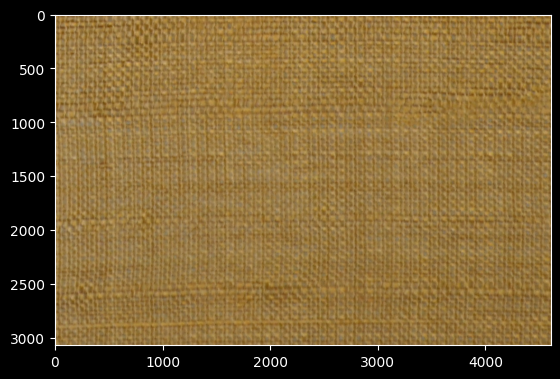

In [5]:
image_path = r"D:\code\8th_Sem\fabric-classification-android-chatbot\Fabric Dataset\Training\Muga\15.jpg"
image = Image.open(image_path)
plt.imshow(image)
image = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    outputs = model(image)

# Post-process the predictions
softmax = torch.nn.Softmax(dim=1)
probabilities = softmax(outputs).cpu().numpy()
predicted_class = torch.argmax(outputs).item()

In [ ]:
if(predicted_class==0):
    print("Predicted Class: Muga")
else:
    print("Predicted Class: Tass")

print("{:.2f}".format(probabilities[0][predicted_class]*100),end='%')

Predicted Class: Muga
99.98%